# Preparing Data

In [1]:
import csv


def get_list(file):
    with open(f'{file}.csv', newline='', encoding='utf-8') as f:
        f = csv.reader(f)
        x = list(f)

    ls = []
    for i in x:
        ls.append(''.join(i))
    return ls

In [2]:
all_positives = get_list('pos')
all_negatives = get_list('neg')
stopwords = get_list('stopwords')

In [3]:
print('Number of positive statements:', len(all_positives))
print('Number of negative statements:', len(all_negatives))

print('\nThe type of all_positives is:', type(all_positives))
print('The type of a tweet entry is:', type(all_negatives[0]))

Number of positive statements: 6000
Number of negative statements: 6000

The type of all_positives is: <class 'list'>
The type of a tweet entry is: <class 'str'>


# Splitting Data
#### Train : Test :: 80 : 20

In [4]:
n = int(len(all_positives)*0.8)
test_pos = all_positives[n:]
train_pos = all_positives[:n]
test_neg = all_negatives[n:]
train_neg = all_negatives[:n]

In [5]:
train_x = train_pos + train_neg 
test_x = test_pos + test_neg

In [6]:
import re
import string
import numpy as np

from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


def process_statements(statement):
    """Process statement function.
    Input:
        statement: a string containing a statement
    Output:
        statements_clean: a list of words containing the processed statement

    """
    stemmer = PorterStemmer()
    
    # remove stock market tickers like $GE
    statement = re.sub(r'\$\w*', '', statement)
    
    # remove old style retweet text "RT"
    statement = re.sub(r'^RT[\s]+', '', statement)
    
    # remove hyperlinks
    statement = re.sub(r'https?:\/\/.*[\r\n]*', '', statement)
    
    # remove hashtags
    # only removing the hash # sign from the word
    statement = re.sub(r'#', '', statement)
    
    # tokenize statements
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    statement_tokens = tokenizer.tokenize(statement)

    statements_clean = []
    for word in statement_tokens:
        if (word not in stopwords and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # statements_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            statements_clean.append(stem_word)

    return statements_clean

In [7]:
def get_freqs(data):
    """Process statement function.
    Input:
        data: an array of strings containing a statement
    Output:
        freq_dict: a dictionary of words representing their frequencies

    """
    freq_dict = {}
    for i in data:
        for word in process_statements(i):
            if word in freq_dict:
                freq_dict[word]+=1
            else:
                freq_dict[word]=1
    return freq_dict

In [8]:
dict_of_positives = get_freqs(train_pos)
dict_of_negatives = get_freqs(train_neg)

In [9]:
pos = dict_of_positives.keys()
neg = dict_of_negatives.keys()

res = pos | neg
len(res)

39006

In [10]:
resultant_dict = {}
for i in res:
    pos_value = dict_of_positives.get(i,0)
    neg_value = dict_of_negatives.get(i,1.5)
    x = pos_value / (pos_value+neg_value)
    
    resultant_dict[i] = x

In [11]:
import math


def check(s):
    cleaned = process_statements(s)
    
    arr = []
    for i in cleaned:
        x = resultant_dict.get(i, 0.5)
        
        arr.append(x)
        
    # print(cleaned)
    # print(np.mean(arr))
    x = np.mean(arr)
    
    return x if not math.isnan(x) else 0.55

# Saving the data

In [12]:
import pickle

In [13]:
def save_data(file, data):
    with open(file, 'wb') as f:
        pickle.dump(data, f)

In [14]:
def load_data(file):
    with open(file, 'rb') as f:
        return pickle.load(f)

In [15]:
file = 'model_1.pkl'
save_data(file, resultant_dict)

In [16]:
load_data(file)

{'♡': 0.6,
 'gurian': 0.0,
 'prob': 0.5555555555555556,
 "ship'": 0.6470588235294118,
 'bunta': 0.0,
 'gerber': 0.4,
 'realism': 0.6666666666666666,
 'unifi': 0.8,
 'low-tech': 0.3333333333333333,
 "hackman'": 0.6666666666666666,
 'safer': 0.3333333333333333,
 'aff': 0.4,
 'zealand': 0.4,
 'ambros': 0.5833333333333334,
 'keynot': 0.0,
 'tv-convers': 0.0,
 'maxim': 0.5833333333333334,
 'ringo': 0.75,
 'uff': 0.0,
 'shalhoub': 0.7142857142857143,
 'ehren': 0.2,
 'strobe': 0.0,
 'princip': 0.574468085106383,
 'briefli': 0.6578947368421053,
 'furnitur': 0.08333333333333333,
 'ancient-sword': 0.0,
 "breillat'": 0.0,
 'afghanistn': 0.0,
 'carter--whos': 0.4,
 'couplehood': 0.0,
 'off-target': 0.4,
 'wealthiest': 0.4,
 'high-qual': 0.0,
 'zest': 0.4,
 'peach-color': 0.4,
 'vikk': 0.4,
 'bronwen': 0.4,
 'majhwar': 0.0,
 'hag': 0.0,
 'improp': 0.5714285714285714,
 'loung': 0.7037037037037037,
 'cari': 0.8,
 'proprietor': 0.5,
 "qt'": 0.4,
 'brace-sport': 0.4,
 'quasi-artist': 0.0,
 'reoccurr': 

# Error Analysis

In [17]:
pos_values = []
for i in test_pos:
    val = check(i)
    print(i)
    print(val)
    print()
    pos_values.append(val)

Be Online mamaya LoiYals para sa Good News.. :-)

TruthfulWordsOf BeaNatividad
#NKNKKPagpapakumbaba
0.5344153271668464

I want to hear your voice :)
#birthdaypresent
0.6202208739614716

Hello people, its me again! :D
0.7716204963911387

If you want to make someone happy, just compliment them or buy them something because you will also feel great too! :)
0.5985265348931869

Hey @ToughChelseaG, I knew the blonde hair was a swerve! :) http://t.co/mpmnNl6vLt
0.46253962099770907

Someone talk to me I cant sleep :/ ill talk about anything you want :)
0.45521981867282735

@im_irrelephant Morning! Thank you for RTs. Have a lovely day, despite the weather! : ) #Rain
0.5661701491781447

@Biltong2u Hi. Just wondering if/when you will have Marmite Cheese spread back in stock? Many thanks :)
0.6158408028765376

Goodtime :-))
0.49851924975320827

@wimagazine @BelDragon_R perfect timing seeing this tweet, have sent an email for more info, recently engaged :D
0.6633241583929215

@EthanGamerTV @Diamond

c:\users\onkar\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\onkar\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


@JulieTwist09 Nice one Julie, looking forward to it :)
0.5746789118339461

@kilby76 @randizuckerberg Very carefully... :)
0.6416981430134459

@planetjedward GoodMorning ! What's coming next? =:D =:D
0.5306793365129979

@Chandlermofo I like u :)
0.6685073267911873

Happy Friday :-) http://t.co/4lxRGxnnH1
0.8355597036139809

@IamComet67P Thank you, sweetest &amp; kindest Comet! :-)
0.6774207129142964

Fav if awake fam :)
0.6774344150124837

@AxioWolf Ahah thanks for the candy Axio! It reminds me a lot of the white rabbit candy :D
0.6170040257004225

@sanahaq17 okay :D
0.7300511164917944

Stats for the day have arrived. 2 new followers and NO unfollowers :) via http://t.co/v5BW8VkiVa.
0.70084198765762

That is basically me - in a nutshell :) taken by @s_whiteant at “letshavecocktailsafternuclai” http://t.co/qMykMymico
0.5390216019122354

Happy Birthday Malik Umair 
Our BIG Celebrity of Canon GANG
Stay Blessed Bro :) http://t.co/D3gjT3xD8n
0.5733353648443281

@JadenChaos I'm about to start

It's not like it hurt my feelings or anything right?? :))))))))))))
0.5691669981900178

Check out our new @NeonArenas Van outside the Olympic Park for @uk_sport Anniversary Games!!! :) http://t.co/6QRbnfXZG7
0.5654788084185595

Every year in August I get fever :p dunno why 😷
0.5299148790672605

@Clareyh Yeah, it's a classy look :-). I've seen people attached to all sorts of 'life saving' equipment, some in beds,having their fix :-0)
0.5271096050793312

its trending.. follow the bobble link. :)
 https://t.co/HZxoiRe88H
0.5893601104192179

next year for sure though :) there's only 2 girls that piss me off
0.537329884177347

@TheVampsBrad where were you standing? so cool!!!! :)
0.6753507497088908

Movie 'Key of Life' (Japanese Version) https://t.co/ib4kfpbBu8 interesting storyline! :)
0.5908682688228325

@anuja3486 Thanks anu :) @Rjain_ @ajayg303 @RGulechha @SNJNIG @Sharma216V @Angel_Priyabgt @praveen_a @prav2410 @SomnathUrhe @Destiinyy303
0.7244458086078712

Also, new layout new me :)
0.

You Lose :D
0.7594568751195258

@Geordnet hehe cool :)
0.7762545242968759

Morning! How are u #today?  What have u got planned? How lazy am I? I'm still in bed! Toast &amp; fresh coffee 2 :). Have a great #FridayFunDay
0.5465982688541258

Welcome to the family :)  https://t.co/TGiFQ0qjnM
0.7802306410593703

@fni Re-signed! :)
0.7496316758747699

can I just meet harry that's all I need in life :-)
0.5851917278121223

Stats for the week have arrived. 1 new follower and NO unfollowers :) via http://t.co/cYnV18t4ZT.
0.7039507291874436

One more sleep til the wedding :-)
0.5542766105605055

Excited about the Chalkhill Park Celebration tomorrow from midday. Come join the fun :-)
0.5963109435500163

@carterreynolds hello!! :) love you Carter :)
0.8029612124532644

What a good read :) 

http://t.co/5UWZh015eo
0.686621611538766

@hattersleyblue3 You too :-)
0.9970384995064165

@GBattered @JimmysFarmHQ enjoy, hope weather holds for you guys :-)
0.5798158237669554

@elfishy_fika done :)
0.7920293

0.6304563492063492

@rupal_hs Happy tweeting! Are you liking the new build? :) ^MM
0.7008864212767584

@kavonyo okay yay! Ask tomorrow please :)
0.6136841442158393

Always :)
Be positive!
0.7143253088666129

@LampShopOnline  You too Lamp Shop :))
0.6011433394720688

My word, @anaturalwedding &amp; @TheStoveRoom - what big sites you've got! Changes a-foot :) #website #development #revamp
0.5309845972467262

@bridgetminamore I voted for #brainchild 3 times, please may I have a poem? :D
0.534866335648661

@Anoushy_Aliyan @8624810880Khan @aliapari86 @AyeshaKhanReal @RiddaMazhar Over Confidence Confined U In Ur Own Limits...:)
0.621189531553158

@DanielNewman Wishing you were in Colorado :)
0.562679620651207

Happy #Friday folks!! If your order your #Goodyear #Tyres online @Protyre, you can get upto £40 cashback!! (T&amp;Cs apply) #yourewelcome :)
0.566390843465231

Nightly routine of simpin :-)
0.6110243307589571

Add me on the snapchat yall :) give me your @ names
0.5558074278200291

@Eko

@FVCKL oh hell yeah :) I'll be expecting a text next Tuesday
0.5364891848214904

@sabahulhaq You're welcome Sabah :-)
0.7490128331688055

Match day Bitchessss !!!

Real Madrid vs Man Shitty :D
0.5076096038627098

@brianteeman @GW1992 I squashed the commits. Did it still make 200 commits? :)
0.5999613094122728

@smallfastloud @dangerbayley we are down in the west country this weekend so next riding day is Tuesday :) sunny weekends all around
0.611921776656202

@Gurmeetramrahim #OurDaughtersOurPride Many Many Congratulations to you PAPA ji :)
0.7072672399689603

@itsbecca65 thanks becca :)
0.7577791419412047

@DeltaDaily @DeltaGoodrem love the new song Delta you rock :)
0.6724732193642109

@jonny_ives we saw this and thought you might need an upgrade as the girls are getting bigger :) http://t.co/AzDWGWAPBb
0.5523050187902151

at first I did love you, but now I just wanna fuck, late night thinking of you until I got a nut :-) :v

"look... http://t.co/8YhLcb16Lf
0.49292463070584047

Enjoy

@OhhhTommyC i aint never uploading lol. Also found another vid of u dancing to henrys trap; keep going on your fitness journey tommy! :)
0.5666914933582952

@creativegossip yes I think it will b stupid to discuss abt wild card entries as of now
Now jst waiting for Vivian's performance :)
0.4958091742602457

New Blog! An Important Life Lesson I learnt from watching this movie :) Something that everyone needs to remember! xx
http://t.co/gco9IJqdcT
0.6303330347591466

I'm not the best, not the most perfect, but I promise to love you with my whole heart. :)
0.5828871688934111

@nair_rinku -Its u with transparent...glasses..:-)
0.5582249256964122

@bitcoinagile thanks for sharing Bitcoin News Stream, have a great Monday :) (insight by http://t.co/rMjqzWRE37)…… h http://t.co/a4DNHbw78q
0.6043538998978517

@nickhunterr Yes it is :D
0.7398412698412699

@ClimateRetweet Thanks for the retweet! :) Make sure to keep in touch for more news of our light bulbs made from corn waste.
0.5520096300251297

In [18]:
error_in_pos = 0
for i in pos_values:
    if i<=0.5:
        error_in_pos+=1

error_in_pos = error_in_pos/len(pos_values)*100

In [19]:
neg_values = []
for i in test_neg:
    val = check(i)
    print(i)
    print(val)
    print()
    neg_values.append(val)

@selenagomez why did you have answer fans when i was sleep ??? :(
0.332981080961274

@NiaLovelis Nia I want to meet you again :(
0.3781789188320352

@swiftlywatson ahh I hope you can!! :(
0.23289996322736126

@abhic4ever Terrible, just terrible. :(
0.1443264996538977

@uhAkie @CloakZTE but how :(
0.0002871912693854107

I miss the seniors very very much :((
0.366882267228963

@DIESEL Please help me to find the replacement strap for my DZ9055 :( I love that watch!
0.4217624894894131

My KIK - entlead590 #kik #kikmenow #nudes #hornykik #tinder #quote #webcamsex :( http://t.co/gYw0ckFKhR
0.28998930765320563

@Morteraaaaa tuesday daw :(
0.4167623970897951

Today was meant to be quiet day to clean the shop but now I'm super busy with clients :(
0.48181084125682383

@djjoeyfunk yep twice :(
0.3045401748675729

justinbieber can u pls follow me on &gt;daianerufato&lt; i've been trying for too long :( ilysm bae! xx (July 24, 2015 at 07:02AM)
0.35416838574865334

@Uber_Dublin no ice cream for ifs

you already knew i couldn't stand to let people dislike me :(( it's burdensome and i want totally clear it as soon as possible
0.4227203571252146

@aquazzSky same here omg I miss them so badly :(((
0.17670118248671662

Amelia didnt stalk my twitter :(
0.27319205317695766

oh, i missed the broadcast. : (
0.4151415080213394

i really can't stream on melon i feel useless :-(
0.37820903892123087

I need to stop looking at old soccer pictures :(
0.3920090540514364

Got an interview for the job that I want but they rang me Tuesday for the interview on Thursday but in on holiday :(
0.5296856903976315

@AndreaMarySmith very helpful .... Or will be once I stop crying :(
0.36792129857803635

@realyys_ OTL NEVERMIND :( at least i got jeon so
0.21744293005676796

And AS SOON as I tweeted that she planted her claws in my thigh for traction and zoomed away :(
0.33644438912916197

@luketothestars damnit :(
0.16681026230135937

@KLM I used to be PRY/PV ..... wish I could relive those days and become N

@tiaramescudi girl that was so quick too :(
0.32365389269096817

so many nasty, narrow minded people :(
0.4702987296298918

i want this in my room :-( http://t.co/alpqbVixcP
0.32163713154292656

Because your friend does not respect your life :-( I'm sorry  https://t.co/ApJ18ZWK0x
0.40980618625968324

@CollagenShots Sadly not :( @Fighting_Fifty @AmazingPRltd @Janettaras @Gracefodor @NikkiTMB @rozhubley
0.26507208053906123

Sucks how I'm Gona miss Chellos party :(
0.35804226450991444

@RCDeportivo hello, any info about possible interest in Jonathas ?? He is close to join Betis :(
0.5187325374962259

@LizaNMinnelli i can't watch it on my phone. Sorry :( thank you still &lt;3
0.45370312307376415

The taxi driver thought me and Sophie worked for Nintendo and took us into the gates :( the security guards gave us the dirtiest looks haha
0.454344352629886

@1994sdork omg :-(( I LOVE YOU SO MUCH MONICA SEE YOU SOON AAAHHH !!!
0.39704881380812496

:((( (at Crepes 40) — https://t.co/bazEmHlhYL
0.

The amount i'm eating these days is ridiculous, don't know why I'm suddenly always hungry :(
0.405307159510374

omg when ally hugs mani she wraps her arms around her neck and pulls her closer :-(((
0.442572906862348

@SensodyneIndia I loved it but this #ToothSensitivity :-(
0.21055465805061926

@jjjaneell yes we should :(
0.24157216706326415

@guptashas @cquenx We were heartbroken too! :( @Uber_Delhi
0.20014359563469272

A chover :(
0.2501435956346927

i want cebu lechon :(
0.36307384002292836

my head is killing me :(
0.29998448483933365

@BABYGVL i want a kitten so badly oh my god :((
0.37469985518391313

@Taylorr0se if I sleep, I won't wake up on time :(
0.3568721954362871

Add my SNAPCHAT : JannyGreen22 #snapchat #kiksex #xxx #seduce #tagsforlikes #nakamaforever #hotels :( http://t.co/K8jYN7SdAL
0.35995251644297466

@ellieharveyy it probably your fault he lost his phone :(
0.3660827673044162

@Glanny_ @soL_Lyah @_wattie I told him to suicide and kill both of you, but you ran away f

Good morning, Twitter friends! Hope you all have an amazing day! So freakin tired, need more sleep :(
0.42402912805666976

😢 "@ haestarr: i’m just :(( http://t.co/FY8LWoZmob"
0.2399366626822112

@Citadel_Hoju @Citadel_Carry @StubsAU @Citadel_Jimz I wish I was there to help :(
0.32790559650792717

@junior_jones it was good as always 😀Flying back today though :(
0.47071753904335006

Why do I need to have a car that functions as a car :(
0.3666523827575262

I wish Twitter would support audio recordings. I would send yall snippets, these are amazing :(
0.46237192287037776

Et Brotherhood of Steel ? :( https://t.co/3qH5rrf0xs
0.5113045167113556

@JayMcGuiness  :-( please notice mefd
0.3316603734004615

Missing Diana :(
0.1751822356134399

The master @GodfreyElfwick has figured out how to turn led into gold, we're doomed :(
@Meteoryan
0.4931171495787222

i want to pull an all nighter but i'm so sleepy already :(
0.3404670183481385

All I ever wanna do is sleeep :( but they won't let mee
0.22

@eyeammarkk omg :( not gonna happen , yeah we wish..
0.36401647069135834

@parisianskies :( at lest you have the GP to get you through it ^_^
0.21807009181791503

@nambooti aww :( catch them at the departure then!
0.3672151492185688

@98_madhvi_tommo  it apparently isnt :(
0.1363640742386421

@SensodyneIndia i miss those days :( #ToothSensitivity.
0.22193594973108152

@natalieegiselle it's unavailable now :(
0.2501435956346927

@i_am_mill_i_am you mean we can't wipe them out? :-(
0.3217278960025845

Just found out my flight home is 13 hours long :(((((((
0.46307967656423216

@oIiverfelicitys UGH YUCK :( make sure you rest the next two days then
0.39982418015865184

@carissakenga omg so sad then on your birthday sorry i didnt send something ystrday ill do it later cuz i dont have my phone now :(((
0.35925423202729834

seolhyun isnt in these first eps because shes filming a drama :((
0.4004627149079682

@NZRR_S3 sorry :(
0.0908171707642264

I always get like 5 4-piece spicy nuggets :(
0.

In [20]:
error_in_neg = 0
for i in neg_values:
    if i>0.5:
        error_in_neg+=1

error_in_neg = error_in_neg/len(neg_values)*100

In [21]:
print(f'Error in positive statements is {error_in_pos}%.')
print(f'Error in positive statements is {error_in_neg}%.')

Error in positive statements is 5.166666666666667%.
Error in positive statements is 2.833333333333333%.


In [22]:
import matplotlib.pyplot as plt

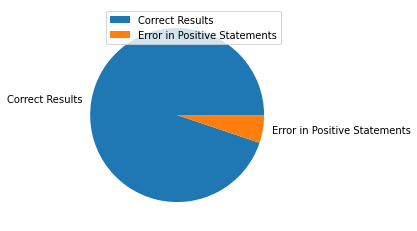

<Figure size 432x288 with 0 Axes>

In [23]:
plt.pie([100 - error_in_pos, error_in_pos], labels=['Correct Results', 'Error in Positive Statements'])
plt.legend()
plt.show()
plt.savefig('result_positive.png')

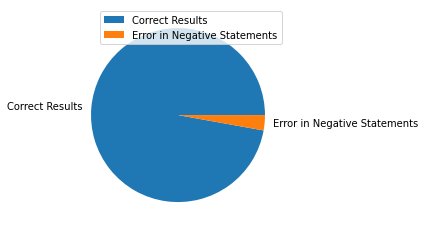

<Figure size 432x288 with 0 Axes>

In [24]:
plt.pie([100 - error_in_neg, error_in_neg], labels=['Correct Results', 'Error in Negative Statements'])
plt.legend()
plt.show()
plt.savefig('result_negative.png')

In [25]:
check('this movie has no value addition to the person')

0.4829414177936603

In [26]:
check('''richard gere can be a commanding actor , but he's not always in great films . 
everything comes together here . 
gere is a big time chicago defense attorney who takes on a seemingly unwinable case in hopes of even more publicity . 
it doesn't go exactly as he expects . 
gere's client , aaron ( edward norton ) , is a shy stuttering tennessee boy who is accused of brutally murdering and mutilating a catholic archbishop . 
the evidence is stacked against him . 
he was caught running from the scene covered in the bishop's blood . 
his bloody footprints are all over the murder scene . 
he has a relationship with the priest . 
gere talks to the boy , believes that he is actually innocent and sets about finding the real killer . 
despite the lawyer's proclamations that he doesn't care about the guilt of his clients and that the real thrill is gambling with people's lives , he becomes involved with aaron and is determined to free him . 
lots of complications and twists . 
the prosecuting attorney is gere's former co-worker and lover . 
they both work each other's motives to their legal advantages and it gets messy . 
her boss had major economic dealings with the archbishop that went sour and seems to have crime connections . 
aaron gets weirder and weirder as the trial goes on . 
gere's case is falling apart and he is faced with about a dozen ethical dilemmas . 
gere is exceptional as the well-dressed reserved counselor , but just once , i wanted to see him kick back and come out of his " suit " persona . 
even when he loses it , you don't see very far inside . 
norton's aaron is convincing : he comes across as the backwoods kid misplaced in the big city . 
the supporting cast does a fine job of holding together the story . 
as with most of the effective courtroom dramas , the cinematography is crisp and rich . 
the story will keep you on the edge of your seat . 
nothing is what it seems . 
''')

0.552218135552859

In [27]:
check(''' " quest for camelot " is warner bros . ' first feature-length , fully-animated attempt to steal clout from disney's cartoon empire , but the mouse has no reason to be worried . 
the only other recent challenger to their throne was last fall's promising , if flawed , 20th century fox production " anastasia , " but disney's " hercules , " with its lively cast and colorful palate , had her beat hands-down when it came time to crown 1997's best piece of animation . 
this year , it's no contest , as " quest for camelot " is pretty much dead on arrival . 
even the magic kingdom at its most mediocre -- that'd be " pocahontas " for those of you keeping score -- isn't nearly as dull as this . 
the story revolves around the adventures of free-spirited kayley ( voiced by jessalyn gilsig ) , the early-teen daughter of a belated knight from king arthur's round table . 
kayley's only dream is to follow in her father's footsteps , and she gets her chance when evil warlord ruber ( gary oldman ) , an ex-round table member-gone-bad , steals arthur's magical sword excalibur and accidentally loses it in a dangerous , booby-trapped forest . 
with the help of hunky , blind timberland-dweller garrett ( carey elwes ) and a two-headed dragon ( eric idle and don rickles ) that's always arguing with itself , kayley just might be able to break the medieval sexist mold and prove her worth as a fighter on arthur's side . 
 " quest for camelot " is missing pure showmanship , an essential element if it's ever expected to climb to the high ranks of disney . 
there's nothing here that differentiates " quest " from something you'd see on any given saturday morning cartoon -- subpar animation , instantly forgettable songs , poorly-integrated computerized footage . 
 ( compare kayley and garrett's run-in with the angry ogre to herc's battle with the hydra . 
i rest my case . ) 
even the characters stink -- none of them are remotely interesting , so much that the film becomes a race to see which one can out-bland the others . 
in the end , it's a tie -- they all win . 
that dragon's comedy shtick is awfully cloying , but at least it shows signs of a pulse . 
at least fans of the early-'90s tgif television line-up will be thrilled to find jaleel " urkel " white and bronson " balki " pinchot sharing the same footage . 
a few scenes are nicely realized ( though i'm at a loss to recall enough to be specific ) , and the actors providing the voice talent are enthusiastic ( though most are paired up with singers who don't sound a thing like them for their big musical moments -- jane seymour and celine dion ? ? ? ) . 
but one must strain through too much of this mess to find the good . 
aside from the fact that children will probably be as bored watching this as adults , " quest for camelot " 's most grievous error is its complete lack of personality . 
and personality , we learn from this mess , goes a very long way . 
''')

0.46955214106636634

In [32]:
check("hate")

0.41025641025641024